In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
quandl.ApiConfig.api_key = '_sbkgpPqyHKZTMdzkace'

selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA', 'AAPL']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2018-1-1', 'lte': '2018-12-31' }, paginate=True)
data.head()

,date,ticker,adj_close
None,,,
0,2018-01-02,AAPL,172.26
1,2018-01-03,AAPL,172.23
2,2018-01-04,AAPL,173.03
3,2018-01-05,AAPL,175.00
4,2018-01-08,AAPL,174.35


In [3]:
clean = data.set_index('date')
table = clean.pivot(columns='ticker')
table.head()

adj_close                                     
ticker          AAPL    CNP      F     GE    TSLA     WMT
date                                                     
2018-01-02    172.26  28.02  12.66  17.98  320.53   98.59
2018-01-03    172.23  27.96  12.76  18.15  317.25   99.45
2018-01-04    173.03  27.99  12.98  18.53  314.62   99.54
2018-01-05    175.00  27.87  13.20  18.54  316.58  100.13
2018-01-08    174.35  28.04  13.15  18.28  336.41  101.61

In [8]:
table.pct_change()
table.mean()*250

           ticker
adj_close  AAPL      42526.136364
           CNP        6862.727273
           F          2929.924242
           GE         4138.780303
           TSLA      83881.101515
           WMT       25697.196970
dtype: float64

In [5]:
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]
df.head()

,Returns,Volatility,Sharpe Ratio,CNP Weight,F Weight,WMT Weight,GE Weight,TSLA Weight,AAPL Weight
0,0.109372,0.206340,0.530058,0.184018,0.203357,0.010147,0.061122,0.244198,0.297158
1,-0.341585,0.193497,-1.765326,0.101698,0.296053,0.239047,0.062927,0.183615,0.116661
2,-0.512058,0.189570,-2.701151,0.063767,0.275414,0.338476,0.081458,0.029295,0.211590
3,-0.643378,0.227760,-2.824809,0.304412,0.115351,0.286169,0.216250,0.020246,0.057571
4,-0.320772,0.197598,-1.623354,0.052556,0.279497,0.146356,0.162695,0.206554,0.152343


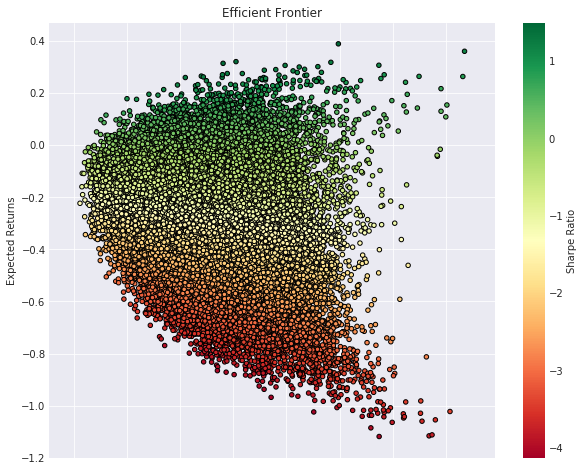

In [6]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [12]:
weights = np.random.random(num_assets)
#weights /= np.sum(weights)
weights

array([0.57304703, 0.50044027, 0.66461971, 0.5914101 , 0.10174861,
       0.01822223])